## 1. Import libraries, test data and split into training/test data sets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('Salary_Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35)

## 2. Train the Simple Linear Regression model

Use the training data set to test the model

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## 3. Start predictions

Use the test data set to predict the previous trained model

In [3]:
y_pred = model.predict(x_test)

## 4. Display graph and details

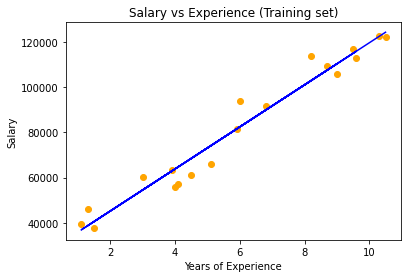

Coefficient b0:  26690.306212717114 

Coefficient b1:  9285.656477507744 



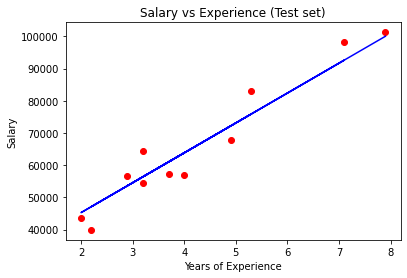

Q(b0, b1):  298285576.7395277 

   x-values   y-value  y-predicted-value  residual_epsilon
0     [4.9]   67938.0       72190.022953       4252.022953
1     [3.2]   54445.0       56404.406941       1959.406941
2     [3.7]   57189.0       61047.235179       3858.235179
3     [7.1]   98273.0       92618.467203       5654.532797
4     [2.0]   43525.0       45261.619168       1736.619168
5     [4.0]   56957.0       63832.932123       6875.932123
6     [2.2]   39891.0       47118.750463       7227.750463
7     [3.2]   64445.0       56404.406941       8040.593059
8     [5.3]   83088.0       75904.285544       7183.714456
9     [2.9]   56642.0       53618.709997       3023.290003
10    [7.9]  101302.0      100046.992385       1255.007615


In [4]:
from sklearn.metrics import mean_squared_error
from itertools import zip_longest

plt.scatter(x_train, y_train, color = 'orange')
plt.plot(x_train, model.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

print('Coefficient b0: ', model.intercept_, '\n')
print('Coefficient b1: ', model.coef_[0], '\n')

plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

df = pd.DataFrame(list(zip_longest(x_test, y_test, y_pred, fillvalue=0)), columns=['x-values', 'y-value', 'y-predicted-value'])
df["residual_epsilon"] = (df['y-value'] - df['y-predicted-value']).abs()

print('Q(b0, b1): ', mean_squared_error(y_test, y_pred) * len(x_test), '\n')
print(df)